Predict Loan Eligibility for Dream Housing Finance company
--------------------------------------------------------------------------------------
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Variable	Description
Loan_ID	Unique Loan ID
Gender	Male/ Female
Married	Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	(Target) Loan approved (Y/N)

Submission file format
---------

Variable	Description
Loan_ID	Unique Loan ID
Loan_Status	(Target) Loan approved (Y/N)

Importing the library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

$loading the dataset

In [5]:
train=pd.read_csv('train1.csv')

In [6]:
test=pd.read_csv('test1.csv')

In [7]:
train_original=train.copy()

In [8]:
test_original=test.copy()

HYPOTHESIS GENERATION

1.SALARY:high salary high chance of getting the loan.

2.PREVIOUS HISTORY:if the loanee had previouly repayed the dept has higher chance of getting loan

3.LOAN AMOUNT:lower the loan amount higher the chance of getting the loan.

4.LOAN-TERM:lesser the term higher the chance of the getting the loan.

5.EMI:lesser amount is payed to repay the loan,higher the chance of getting the loan.



EXPLORATORY DATA ANALYSIS

In [ ]:
train.columns

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [12]:
train.shape

(614, 13)

In [13]:
test.shape

(367, 12)

UNIVARIATE ANALYSIS

let us look into the target variable ,Loan_status and its features.

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

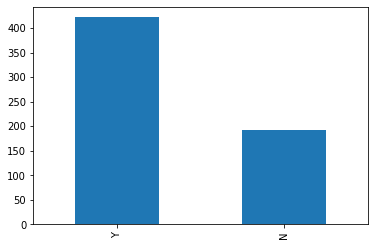

In [15]:
train['Loan_Status'].value_counts().plot.bar()

3 types of the variables:

1.CATEGORICAL FEATURES:they have the categories. eg(gender,marital_status etc)

2.ORDINAL FEATURES:they have some order involved.eg(dependents,education,property_area)

3.NUMERICAL VALUES:these features have numerical values(loanAmount,applicant income,coapplcnat income etc)

LETS US VISUALISE THE INDEPENDENT VARIABLE(categorical and ordinal)

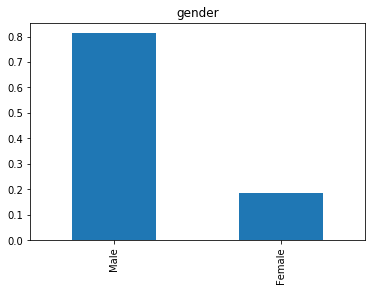

In [17]:
train['Gender'].value_counts(normalize=True).plot.bar(title='gender')

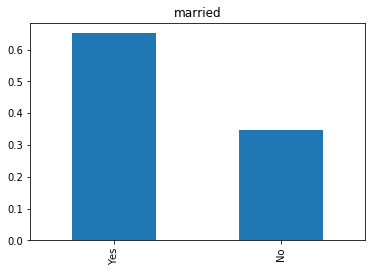

In [18]:
train['Married'].value_counts(normalize=True).plot.bar(title='married')

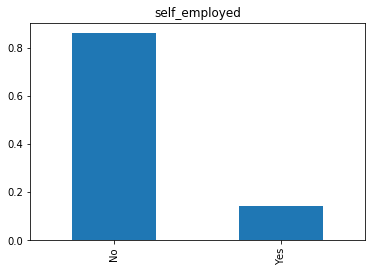

In [19]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='self_employed')

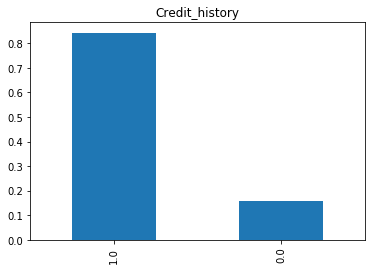

In [20]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_history')

INDEPENDENT VARIABLE(ORDINAL)

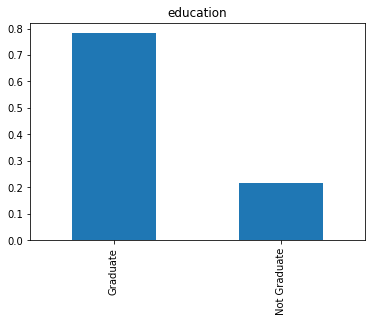

In [21]:
train['Education'].value_counts(normalize=True).plot.bar(title='education')

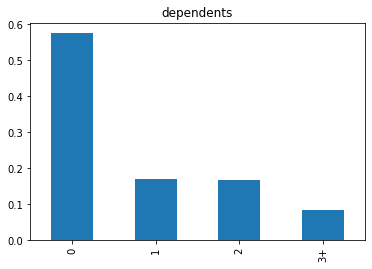

In [22]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='dependents')

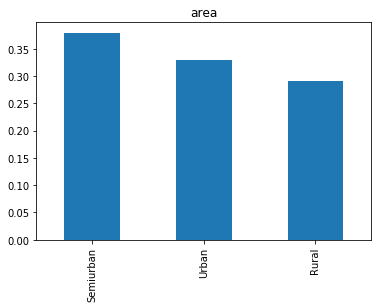

In [23]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='area')

INDEPENDENT VARIABLE(NUMERICAL)

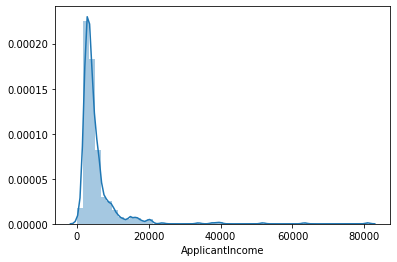

In [24]:
sns.distplot(train['ApplicantIncome'])

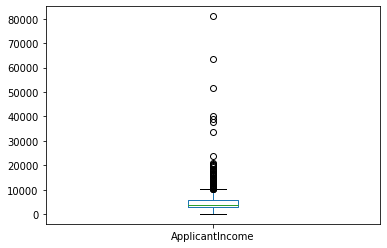

In [25]:
train['ApplicantIncome'].plot.box()

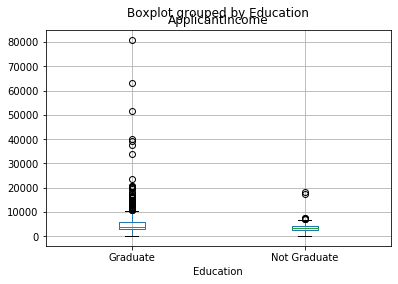

In [27]:
train.boxplot(column='ApplicantIncome',by='Education')

AttributeError: 'function' object has no attribute 'box'

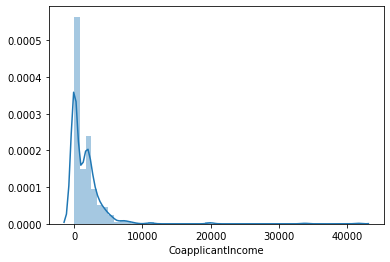

In [28]:
sns.distplot(train['CoapplicantIncome']).plot.box(figsize=(16,5))

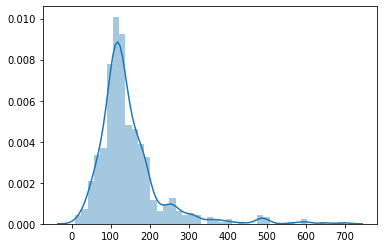

In [29]:
sns.distplot(train[['LoanAmount']])

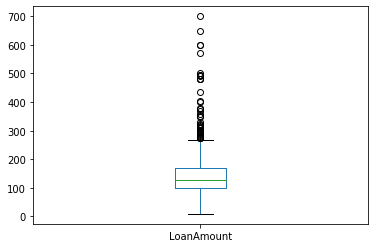

In [30]:
train['LoanAmount'].plot.box()

BIVARIATE ANALYSIS

LETS US THE CHECK THE ABOVE MENTIONED HYPOTHESIS WITH THE BIVARIATE ANALYSIS.

categorical independent variable v/s target variable



In [33]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])
gender


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


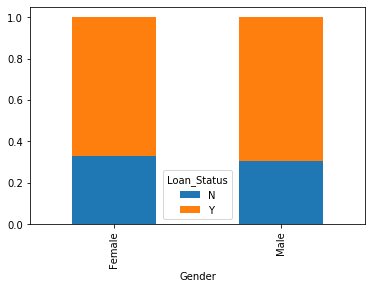

In [34]:
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [35]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


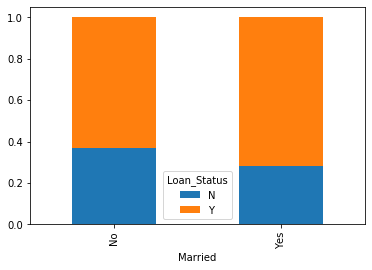

In [36]:
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [38]:
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


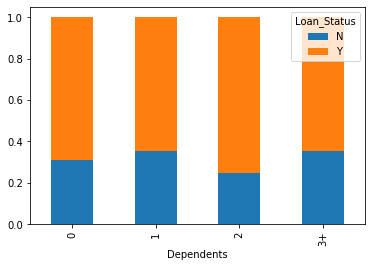

In [39]:
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [40]:
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
self_employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


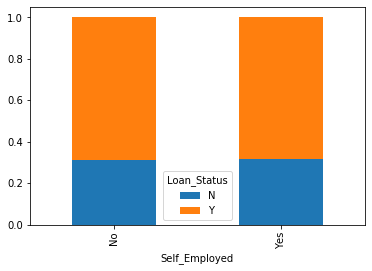

In [41]:
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [42]:
education=pd.crosstab(train['Education'],train['Loan_Status'])
education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


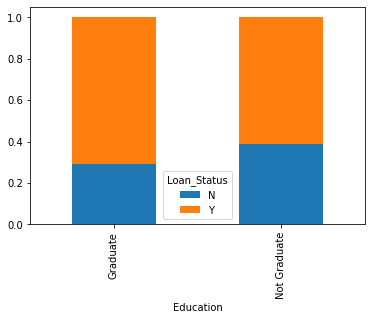

In [43]:
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

categorical variable v/s target variable

In [44]:
credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credit_history

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


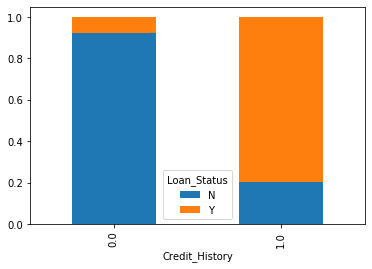

In [45]:
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [47]:
property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


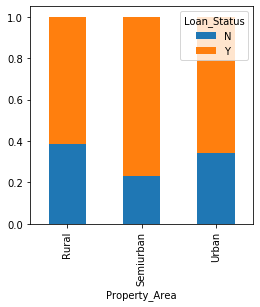

In [50]:
property_Area.div(property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

numerical independent variable v/s target variable

we check the mean income of the people for whom loan is approved and mean income of people for whom loan is not approved


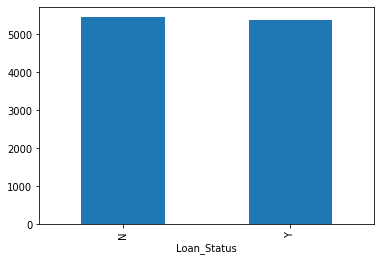

In [49]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [51]:
bins=[0,2500,4000,6000,8000]
group=['Low','Average','high','very high']

In [52]:
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [53]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

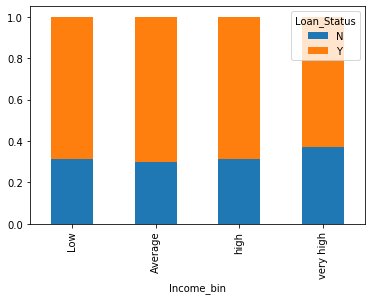

In [54]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')
            

OUR HYPOTHESIS THAT APPLICANT INCOME INCREASES CHANCES OF LOAN APPROVAL IS VOILATED.

In [62]:
bins=[0,1000,3000,42000]
group1=['Low','Average','high']

In [63]:
train['coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group1)

In [58]:
Coapplicant_Income_bin=pd.crosstab(train['coapplicant_Income_bin'],train['Loan_Status'])

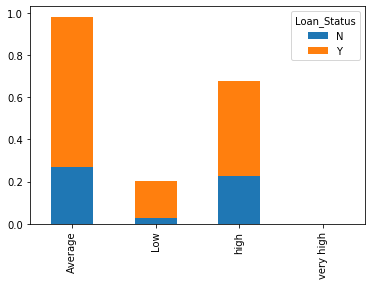

In [59]:
Coapplicant_Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')

above observation shows that if coapplicant income is less,chance of approval is more this is not right.This is because most of the coappliccant income is less ,so we combine applicant income and coapplicant income , 

In [64]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','very high']
train['Total_income_bin']=pd.cut(train['Total_income'],bins,labels=group)

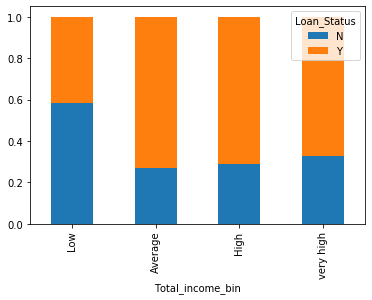

In [65]:
total_income_bin=pd.crosstab(train['Total_income_bin'],train['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')

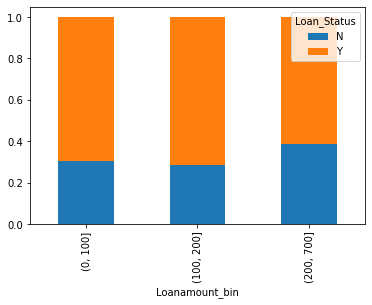

In [66]:
bins=[0,100,200,700]
group=['Low','average','high']
train['Loanamount_bin']=pd.cut(train['LoanAmount'],bins,group)
loanamount_bin=pd.crosstab(train['Loanamount_bin'],train['Loan_Status'])
loanamount_bin.div(loanamount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')


In [69]:
train=train.drop(['Income_bin','coapplicant_Income_bin','Loanamount_bin','Total_income_bin'],axis=1)

In [70]:
train['Dependents'].replace('3+',3,inplace=True)

In [71]:
test['Dependents'].replace('3+',3,inplace=True)

In [72]:
train['Loan_Status'].replace('N',0,inplace=True)

In [73]:
train['Loan_Status'].replace('Y',1,inplace=True)

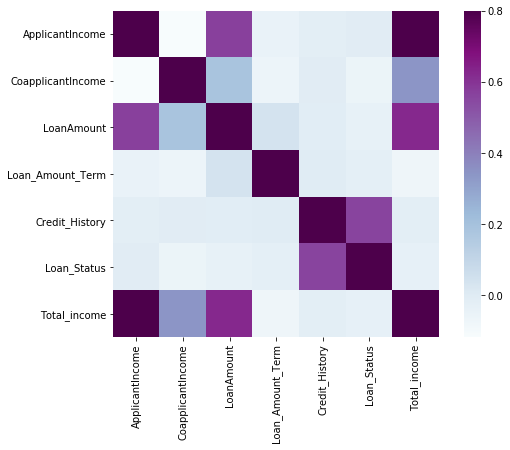

In [76]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

Missing values imputation
-----------------
for numerical values:mean/median

categorical values:mode

In [44]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [46]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [47]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [48]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [49]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [50]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [52]:
train['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [53]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [54]:
train['Loan_Amount_Log']=np.log(train['LoanAmount'])


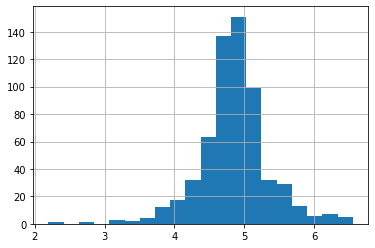

In [55]:
train['Loan_Amount_Log'].hist(bins=20)

In [56]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_Amount_Log      0
dtype: int64

univariate analysis
--------

 target variable-categorical

In [58]:
test=test.drop('Loan_ID',axis=1)

In [80]:
m=train.drop('Loan_Status',1)
n=train.Loan_Status

KeyError: "['Loan_Status'] not found in axis"

Dummy variables turns categorical values to series of 0,1

In [61]:
m=pd.get_dummies(m)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [68]:
x_train,x_cv,y_train,y_cv=train_test_split(m,n,test_size=0.3)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [70]:
model=LogisticRegression()

In [71]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
pred_train=model.predict(x_cv)

In [75]:
accuracy_score(y_cv,pred_train)

0.8

we will build 4 models in this section
------------
1.Logistic regression

2.Decision tree

3.Random forest

4.XGboost

In [86]:
from sklearn.model_selection import StratifiedKFold

In [91]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(m,n):
    print('\n{}  of kfold'.format(i,kf.n_splits))
    xtr,xv1=m.loc[train_index],m.loc[test_index]
    ytr,yv1=n.loc[train_index],n.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xv1)
    score=accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1




1  of kfold
accuracy_score 0.8048780487804879

2  of kfold
accuracy_score 0.8373983739837398

3  of kfold
accuracy_score 0.7804878048780488

4  of kfold
accuracy_score 0.7886178861788617

5  of kfold
accuracy_score 0.7950819672131147


In [96]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yv1,pred_train)
auc=metrics.roc_auc_score(yv1,pred_train)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation,auc'+str(auc))
plot.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [122, 185]

In [97]:
from sklearn import tree
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(m,n):
    print('\n{}  of kfold'.format(i,kf.n_splits))
    xtr,xv1=m.loc[train_index],m.loc[test_index]
    ytr,yv1=n.loc[train_index],n.loc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xv1)
    score=accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1



1  of kfold
accuracy_score 0.7073170731707317

2  of kfold
accuracy_score 0.7235772357723578

3  of kfold
accuracy_score 0.7073170731707317

4  of kfold
accuracy_score 0.7154471544715447

5  of kfold
accuracy_score 0.6885245901639344


In [100]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(m,n):
    print('\n{}  of kfold'.format(i,kf.n_splits))
    xtr,xv1=m.loc[train_index],m.loc[test_index]
    ytr,yv1=n.loc[train_index],n.loc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xv1)
    score=accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1



1  of kfold
accuracy_score 0.8130081300813008

2  of kfold
accuracy_score 0.8211382113821138

3  of kfold
accuracy_score 0.7967479674796748

4  of kfold
accuracy_score 0.8130081300813008

5  of kfold
accuracy_score 0.7950819672131147


In [107]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [110]:
from xgboost import XGBClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(m,n):
    print('\n{}  of kfold'.format(i,kf.n_splits))
    xtr,xv1=m.loc[train_index],m.loc[test_index]
    ytr,yv1=n.loc[train_index],n.loc[test_index]
    model=XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xv1)
    score=accuracy_score(yv1,pred_test)
    print('accuracy_score',score)
    i+=1



1  of kfold
accuracy_score 0.8130081300813008

2  of kfold
accuracy_score 0.7967479674796748

3  of kfold
accuracy_score 0.7886178861788617

4  of kfold
accuracy_score 0.7723577235772358

5  of kfold
accuracy_score 0.7704918032786885
